In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
# from node2vec import Node2Vec

df0 = pd.read_csv('train.csv',sep=',')
#df1 = pd.read_csv('test.csv',sep=',')

In [2]:
df = df0.sample(n=5000)

In [3]:
# Check for missing data
df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             13
satisfaction                          0


In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
27853,27853,47716,Male,Loyal Customer,20,Personal Travel,Eco Plus,1428,2,1,...,4,4,4,2,4,2,4,0,0.0,neutral or dissatisfied
97652,97652,5104,Female,Loyal Customer,18,Personal Travel,Eco,223,4,4,...,4,3,2,4,5,4,4,0,0.0,neutral or dissatisfied
86215,86215,63471,Female,disloyal Customer,59,Business travel,Eco Plus,337,3,3,...,5,1,3,1,4,2,5,22,21.0,neutral or dissatisfied
15584,15584,87145,Male,Loyal Customer,23,Business travel,Eco Plus,594,2,3,...,2,2,3,3,1,3,2,15,7.0,neutral or dissatisfied
73059,73059,32964,Male,Loyal Customer,48,Personal Travel,Eco,163,2,5,...,1,4,3,4,5,5,1,0,0.0,neutral or dissatisfied


In [5]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [6]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
27853,Male,Loyal Customer,20,Personal Travel,Eco Plus,1428,2,1,2,2,...,4,4,4,2,4,2,4,0,0.0,neutral or dissatisfied
97652,Female,Loyal Customer,18,Personal Travel,Eco,223,4,4,4,3,...,4,3,2,4,5,4,4,0,0.0,neutral or dissatisfied
86215,Female,disloyal Customer,59,Business travel,Eco Plus,337,3,3,3,1,...,5,1,3,1,4,2,5,22,21.0,neutral or dissatisfied
15584,Male,Loyal Customer,23,Business travel,Eco Plus,594,2,3,3,3,...,2,2,3,3,1,3,2,15,7.0,neutral or dissatisfied
73059,Male,Loyal Customer,48,Personal Travel,Eco,163,2,5,0,3,...,1,4,3,4,5,5,1,0,0.0,neutral or dissatisfied


In [7]:
df.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [8]:
df.Gender = df.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df['Customer Type'] = df['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df['satisfaction'] = df['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

In [9]:
df.reset_index(drop=True,inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,20,0,1,1428,2,1,2,2,...,4,4,4,2,4,2,4,0,0.0,0
1,1,0,18,0,0,223,4,4,4,3,...,4,3,2,4,5,4,4,0,0.0,0
2,1,1,59,1,1,337,3,3,3,1,...,5,1,3,1,4,2,5,22,21.0,0
3,0,0,23,1,1,594,2,3,3,3,...,2,2,3,3,1,3,2,15,7.0,0
4,0,0,48,0,0,163,2,5,0,3,...,1,4,3,4,5,5,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,44,1,0,1674,5,5,5,5,...,5,1,1,4,3,4,5,0,0.0,1
4996,1,0,30,0,0,1428,2,1,2,3,...,1,1,3,3,4,4,1,5,0.0,0
4997,1,0,30,1,2,1948,4,4,4,4,...,4,4,5,4,3,4,4,22,7.0,1
4998,1,1,25,1,0,271,2,2,3,3,...,5,4,3,3,2,4,5,0,0.0,0


In [10]:
df.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [11]:
# max number of graph generation features
np.log(len(df))

8.517193191416238

In [12]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,0,20,0,1,1428,2,1,2,2,...,4,4,4,4,2,4,2,4,0,0
1,1,0,18,0,0,223,4,4,4,3,...,4,4,3,2,4,5,4,4,0,0
2,1,1,59,1,1,337,3,3,3,1,...,5,5,1,3,1,4,2,5,22,0
3,0,0,23,1,1,594,2,3,3,3,...,2,2,2,3,3,1,3,2,15,0
4,0,0,48,0,0,163,2,5,0,3,...,1,1,4,3,4,5,5,1,0,0


In [13]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

Following variables are used for the graph generation:

- Gender
- Customer Type
- Age
- Type of Travel
- Class

In [14]:
df.Age.describe()

count    5000.000000
mean       39.315600
std        15.057109
min         7.000000
25%        27.000000
50%        40.000000
75%        50.000000
max        85.000000
Name: Age, dtype: float64

In [15]:
X = df

In [16]:
X.Age = X.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [17]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,0,0,0,1,1428,2,1,2,2,...,4,4,4,4,2,4,2,4,0,0
1,1,0,0,0,0,223,4,4,4,3,...,4,4,3,2,4,5,4,4,0,0
2,1,1,3,1,1,337,3,3,3,1,...,5,5,1,3,1,4,2,5,22,0
3,0,0,0,1,1,594,2,3,3,3,...,2,2,2,3,3,1,3,2,15,0
4,0,0,2,0,0,163,2,5,0,3,...,1,1,4,3,4,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,2,1,0,1674,5,5,5,5,...,5,5,1,1,4,3,4,5,0,1
4996,1,0,1,0,0,1428,2,1,2,3,...,1,1,1,3,3,4,4,1,5,0
4997,1,0,1,1,2,1948,4,4,4,4,...,4,4,4,5,4,3,4,4,22,1
4998,1,1,0,1,0,271,2,2,3,3,...,5,5,4,3,3,2,4,5,0,0


In [18]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.40

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [19]:
genvars = X[['Gender','Customer Type','Age','Type of Travel','Class']]

In [20]:
genvars

,Gender,Customer Type,Age,Type of Travel,Class
0,0,0,0,0,1
1,1,0,0,0,0
2,1,1,3,1,1
3,0,0,0,1,1
4,0,0,2,0,0
...,...,...,...,...,...
4995,0,0,2,1,0
4996,1,0,1,0,0
4997,1,0,1,1,2
4998,1,1,0,1,0


In [21]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [22]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [23]:
A = A + A.T - np.diag(np.diag(A))

In [24]:
G = nx.from_numpy_matrix(A)

In [25]:
nx.is_connected(G)

True

In [26]:
#nx.draw(G,node_size=20)

In [27]:
features = pd.Series(df.satisfaction) # invested or inv_pref

In [28]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [29]:
#pos = nx.spring_layout(G)

In [30]:
#nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
#plt.show()

In [49]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = df.drop(columns=['satisfaction'])
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl.ndata['label'] = torch.tensor(features)

In [50]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [57]:
#def relu(x):
#    return np.max(0,x)

relu = torch.nn.ReLU(inplace=False)

In [58]:
#def norm(x):
#    return np.linalg.norm(x,ord=2)

In [67]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean',activation=relu)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [68]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [69]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [70]:
model = SAGE(in_feats=n_features, hid_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
for epoch in range(250):
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val))


Epoch: 0, train loss: 1.0086, validation loss: 1.0118, training accuracy: 0.4593, validation accuracy: 0.4547
Epoch: 10, train loss: 0.6116, validation loss: 0.6180, training accuracy: 0.7136, validation accuracy: 0.7066
Epoch: 20, train loss: 0.5235, validation loss: 0.5258, training accuracy: 0.8161, validation accuracy: 0.8292
Epoch: 30, train loss: 0.4653, validation loss: 0.4612, training accuracy: 0.8332, validation accuracy: 0.8494
Epoch: 40, train loss: 0.3987, validation loss: 0.3927, training accuracy: 0.8492, validation accuracy: 0.8604
Epoch: 50, train loss: 0.3472, validation loss: 0.3442, training accuracy: 0.8704, validation accuracy: 0.8692
Epoch: 60, train loss: 0.3142, validation loss: 0.3234, training accuracy: 0.8814, validation accuracy: 0.8764
Epoch: 70, train loss: 0.2848, validation loss: 0.3082, training accuracy: 0.8945, validation accuracy: 0.8824
Epoch: 80, train loss: 0.2615, validation loss: 0.2975, training accuracy: 0.9035, validation accuracy: 0.8839
Ep

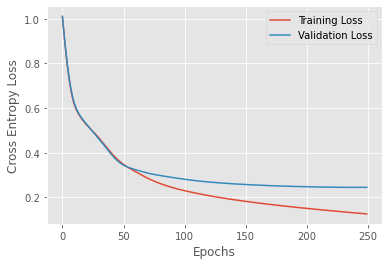

In [71]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

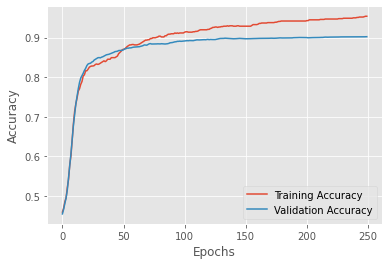

In [72]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.9021223470661673
-------------------------------------------------------------
Classification Accuracy training set 0.9537688442211055
-------------------------------------------------------------
Confusion Matrix validation set:
[[2121  145]
 [ 247 1492]]
-------------------------------------------------------------
Confusion Matrix training set:
[[550   9]
 [ 37 399]]


In [66]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

roc_auc_score(val_lab,indices_val)

0.8989532996969477

In [45]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.8, shuffle=True)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=250, batch_size=5)

Epoch 1/250
200/200 [==============================] - 5s 17ms/step - loss: 0.6408 - accuracy: 0.6610 - val_loss: 0.4902 - val_accuracy: 0.8105
Epoch 2/250
200/200 [==============================] - 3s 13ms/step - loss: 0.4688 - accuracy: 0.8146 - val_loss: 0.3892 - val_accuracy: 0.8493
Epoch 3/250
200/200 [==============================] - 4s 18ms/step - loss: 0.3381 - accuracy: 0.8684 - val_loss: 0.3455 - val_accuracy: 0.8670
Epoch 4/250
200/200 [==============================] - 3s 13ms/step - loss: 0.2928 - accuracy: 0.8878 - val_loss: 0.3246 - val_accuracy: 0.8773
Epoch 5/250
200/200 [==============================] - 2s 10ms/step - loss: 0.2900 - accuracy: 0.8889 - val_loss: 0.3103 - val_accuracy: 0.8825
Epoch 6/250
200/200 [==============================] - 2s 8ms/step - loss: 0.2620 - accuracy: 0.9013 - val_loss: 0.3022 - val_accuracy: 0.8842
Epoch 7/250
200/200 [==============================] - 3s 13ms/step - loss: 0.2289 - accuracy: 0.9239 - val_loss: 0.2937 - val_accuracy: 

Epoch 58/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.3845 - val_accuracy: 0.8880
Epoch 59/250
200/200 [==============================] - 2s 8ms/step - loss: 0.0456 - accuracy: 0.9818 - val_loss: 0.3792 - val_accuracy: 0.8917
Epoch 60/250
200/200 [==============================] - 2s 8ms/step - loss: 0.0441 - accuracy: 0.9828 - val_loss: 0.3850 - val_accuracy: 0.8917
Epoch 61/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0410 - accuracy: 0.9839 - val_loss: 0.3814 - val_accuracy: 0.8907
Epoch 62/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 0.3907 - val_accuracy: 0.8930
Epoch 63/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0515 - accuracy: 0.9780 - val_loss: 0.3871 - val_accuracy: 0.8932
Epoch 64/250
200/200 [==============================] - 2s 8ms/step - loss: 0.0440 - accuracy: 0.9917 - val_loss: 0.3999 - val_accuracy:

200/200 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 1.0311 - val_accuracy: 0.8773
Epoch 171/250
200/200 [==============================] - 1s 6ms/step - loss: 0.0359 - accuracy: 0.9871 - val_loss: 0.9786 - val_accuracy: 0.8823
Epoch 172/250
200/200 [==============================] - 1s 6ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.9268 - val_accuracy: 0.8860
Epoch 173/250
200/200 [==============================] - 1s 6ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.9332 - val_accuracy: 0.8860
Epoch 174/250
200/200 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.9366 - val_accuracy: 0.8857
Epoch 175/250
200/200 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.9415 - val_accuracy: 0.8860
Epoch 176/250
200/200 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.9468 - val_accuracy: 0.8860

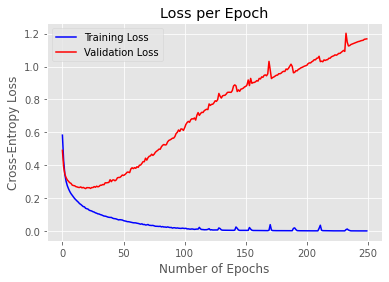

In [47]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

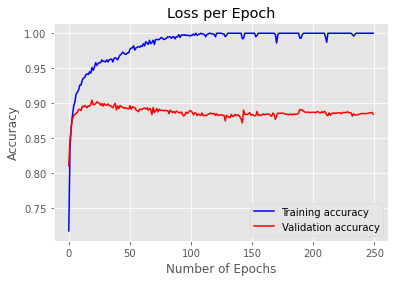

In [48]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Loss per Epoch')
plt.legend()
plt.show()